# Texas Department of Transportation Bridge Condition Analysis Report

## Introduction

The Texas Department of Transportation has undertaken a critical examination to assess the predictive capabilities of specific variables in determining the current condition of bridges. This investigation is pivotal for ensuring the safety and longevity of vital infrastructure assets.

### Background

At the core of this evaluation are crucial variables, each playing a unique role in shaping bridge conditions:

1. **Age (Derived from 'Year')**: Reflecting the bridge's age in years.
2. **Average Use ('AverageDaily')**: Measuring average daily traffic and quantifying the wear and tear experienced by the bridge.
3. **Percent Trucks ('Trucks_percent')**: Signifying the percentage of traffic represented by lorries, a significant factor affecting bridge durability.
4. **Material ('Material')**: Indicating the dominant building material of the bridge, influencing its strength and resistance.
5. **Design ('Design')**: Categorizing the structural design, a pivotal factor in the overall condition of the bridge.

The condition of each bridge is assessed through three critical aspects:

- **Deck ('Deck_rating'):** Evaluating the condition of the bridge's deck.
- **Superstructure ('Superstr_rating'):** Assessing the condition of the bridge's superstructure.
- **Substructure ('Substr_rating'):** Analyzing the condition of the bridge's substructure, including foundations.

This study aims to address two fundamental questions pertinent to our specialized audience:

1. **Predictive Power**: To what extent can these selected variables predict the current condition of bridges, facilitating proactive maintenance for structural integrity?
2. **Variable Impact**: Which of the chosen variables exerts the most significant influence on the bridge's condition, providing insights into mitigating metal corrosion and concrete deterioration?

### Report Scope

This comprehensive report includes rigorous data analysis, variable selection, and the development of regression models. The primary objective is to ensure transparency, accountability, and a thorough understanding of the data analysis process. This approach aligns with the Texas Department of Transportation's commitment to bridge safety and sustainability.

### Target Audience

This report is designed for a specialist in metal corrosion and concrete deterioration. Our audience values comprehensible insights and a transparent methodology for data processing. We aim to clarify and substantiate our assumptions, ensuring that our conclusions are meaningful and justifiable.

The report aims to facilitate informed decision-making, ultimately safeguarding and enhancing the integrity of our bridge infrastructure.

## Part 1: Data Preparation

In Part 1 of this coursework, we embark on a crucial data preparation journey, focusing on the Texas Bridge dataset. This critical analysis phase encompasses continuous and categorical variables, setting the stage for subsequent exploration and modelling. Our primary objective is to diligently prepare the data, ensuring it is ready for robust regression analysis and uncover the nuanced influence of predictor variables on the target variable, a vital aspect of bridge condition assessment.

**Data Source**

This report examines data from the US National Bridge Inspection, maintained by the Federal Highways Agency (FHWA), a part of the US Department of Transportation. The original data is sourced from the National Bridge Inspection section of the FHWA's website.

- The FHWA's database encompasses the entire USA, while our dataset excludes Texas.
- Besides bridges, the FHWA's database includes tunnels (not applicable in Texas) and culverts (which have been excluded), leaving only bridges.
- All bridges in the dataset carry a highway, and what lies underneath may vary, including other roads, waterways, or railways.

### Section 1.1: The Variables

Our dataset includes continuous and categorical variables for our analysis. Here is an overview of the variables:

- *Structure_id*: Unique identifier for each bridge (String).
- *District*: Highway district in Texas responsible for the bridge (Category).
- *Detour_Km*: Length of a detour if the bridge is closed (Continuous).
- *Toll*: Whether a toll is paid to use the bridge (Category).
- *Maintainer*: The authority responsible for the maintenance (Category).
- *Urban*: Whether the bridge is located in an urban or rural area (Category).
- *Status*: The road class, ranging from interstate to local (Category).
- *Year*: The year the bridge was built (Continuous).
- *Lanes_on*: The number of lanes that run over the bridge (Continuous or Discrete).
- *Lanes_under*: The number of lanes under the bridge (Continuous or Discrete).
- *AverageDaily*: The average daily traffic (number of vehicles) (Continuous).
- *Future_traffic*: The estimated daily traffic in approximately 20 years (Continuous).
- *Trucks_percent*: The percentage of traffic made up of 'trucks' (i.e., lorries) (Continuous).
- *Historic*: Whether the bridge is considered historic (Category).
- *Service_under*: The (most important) service under the bridge (Category).
- *Material*: The bridge's dominant material is made from (Category).
- *Design*: The design of the bridge (Category).
- *Spans*: The bridge's number of spans (Category or Discrete).
- *Length*: The length of the bridge in meters (Continuous).
- *Width*: The bridge's width in meters (Continuous).
- *Rated_load*: The rated maximum loading of the bridge (in tonnes) (Continuous).
- *Scour_rating*: The condition concerning possible damage from scouring, relevant for bridges over water (Ordinal).
- *Deck_rating*: The condition of the bridge deck (Ordinal).
- *Superstr_rating*: The condition of the bridge superstructure (Ordinal).
- *Substr_rating*: The condition of the bridge substructure (foundations) (Ordinal).

Below we display more information on our original dataset... 

In [1]:
import pandas as pd

# Read the CSV into a Pandas DataFrame
original_data = pd.read_csv('tx19_bridges_sample.csv', index_col = 'Structure_id')

# Describe the data frame
original_data.describe()

,Detour_Km,Year,Lanes_on,Lanes_under,AverageDaily,Spans,Length,Width,Rated_load,Trucks_percent,Future_traffic
count,34293.000000,34293.000000,34293.000000,34293.000000,34293.000000,34293.000000,34293.000000,34293.000000,34293.000000,34293.000000,34293.000000
mean,10.860117,1981.497419,2.391450,1.688041,11628.005045,3.760505,92.805992,11.804794,29.763398,8.576561,16788.084857
std,26.699284,23.860135,1.230033,3.729693,24230.771544,4.955459,187.107829,6.473383,5.291008,10.347291,35914.835568
min,0.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,6.100000,2.500000,0.000000,0.000000,0.000000
25%,2.000000,1964.000000,2.000000,0.000000,330.000000,1.000000,24.400000,7.300000,24.500000,0.000000,440.000000
50%,3.000000,1985.000000,2.000000,0.000000,3280.000000,3.000000,47.900000,11.000000,32.700000,5.000000,4600.000000
75%,10.000000,2002.000000,2.000000,2.000000,11870.000000,4.000000,88.400000,13.400000,32.700000,13.000000,16820.000000
max,999.000000,2019.000000,15.000000,99.000000,543000.000000,194.000000,6270.300000,228.000000,99.900000,99.000000,999999.000000


In [2]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34293 entries, 000021521-00101 to DAPTRABLI000011
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   District         34293 non-null  object 
 1   Detour_Km        34293 non-null  int64  
 2   Toll             34293 non-null  object 
 3   Maintainer       34293 non-null  object 
 4   Urban            34293 non-null  object 
 5   Status           34293 non-null  object 
 6   Year             34293 non-null  int64  
 7   Lanes_on         34293 non-null  int64  
 8   Lanes_under      34293 non-null  int64  
 9   AverageDaily     34293 non-null  int64  
 10  Historic         34293 non-null  object 
 11  Service_under    34293 non-null  object 
 12  Material         34293 non-null  object 
 13  Design           34293 non-null  object 
 14  Spans            34293 non-null  int64  
 15  Length           34293 non-null  float64
 16  Width            34293 non-null  float6

### Section 1.2: Filtereing out unwanted variabels

As we can see we have many colums here that we will not require in our analysis. We will create a new data frame with only the desired variables for our investigation. 

In [3]:
bridges = original_data[['AverageDaily', 'Trucks_percent', 'Material', 'Design', 'Deck_rating', 'Superstr_rating', 'Substr_rating', 'Year', 'Historic']].copy()

In [4]:
bridges

,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Year,Historic
Structure_id,,,,,,,,,
000021521-00101,1,0.0,Concrete,Slab,Good,Very Good,Very Good,2005,Not historic
000021521-00181,1,0.0,Concrete,Slab,Good,Good,Very Good,2005,Not historic
000021521-TMP20,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good,2012,Not historic
000021525-00012,80,0.0,Timber,Beam,Good,Good,Poor,1950,Not historic
000021580-00092,150,4.0,Concrete,Beam,Good,Very Good,Very Good,2004,Not historic
...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,300,40.0,Concrete,Beam,Good,Good,Good,1994,Not historic
DAPFORHOO000013,300,40.0,Concrete,Beam,Good,Good,Good,2000,Not historic
DAPFORHOO000015,1200,25.0,Concrete,Beam,Good,Good,Good,1996,Not historic


### 1.3: Calculating Bridge Age

In this section, we calculate the age of the bridges, a crucial variable for our bridge condition assessment. Bridge age is vital for understanding its relationship with the current condition.

We determine the bridge age by subtracting the year of construction from the current year. The resulting 'Age' variable is essential for our analysis.frame. 

In [5]:
import datetime

# Calculate the current year
current_year = datetime.datetime.now().year

# Calculate the age of the bridges
bridges = bridges.assign(Age=current_year - bridges['Year'])

In [6]:
bridges

,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Year,Historic,Age
Structure_id,,,,,,,,,,
000021521-00101,1,0.0,Concrete,Slab,Good,Very Good,Very Good,2005,Not historic,18
000021521-00181,1,0.0,Concrete,Slab,Good,Good,Very Good,2005,Not historic,18
000021521-TMP20,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good,2012,Not historic,11
000021525-00012,80,0.0,Timber,Beam,Good,Good,Poor,1950,Not historic,73
000021580-00092,150,4.0,Concrete,Beam,Good,Very Good,Very Good,2004,Not historic,19
...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,300,40.0,Concrete,Beam,Good,Good,Good,1994,Not historic,29
DAPFORHOO000013,300,40.0,Concrete,Beam,Good,Good,Good,2000,Not historic,23
DAPFORHOO000015,1200,25.0,Concrete,Beam,Good,Good,Good,1996,Not historic,27


As we can see from the above, a new column called age has been added to the data frame. 

### Section 1.4 Filtering out Historic Bridges

In this section, we analyse the 'Historic' column to identify a threshold for excluding historic bridges from our analysis, following the recommendation by the Texas Department of Transportation.

There are several compelling reasons why we may choose to exclude historic bridges from our calculations:

1. **Structural Integrity**: Historic bridges may have aged and might not meet modern structural standards. Including them in calculations could skew the results or raise safety concerns. Excluding them from calculations could reduce these safety concerns.

2. **Different Design Standards**: Historic bridges may have been designed and constructed based on older engineering standards and codes, which can significantly differ from contemporary standards. This can impact their load-bearing capacity and response to various factors.

3. **Preservation and Conservation**: Historic bridges are often preserved for their architectural, cultural, or historical significance. Incorporating them in calculations may lead to unnecessary alterations or repairs that could compromise their historical value.

4. **Cost Considerations**: Restoring or upgrading historic bridges can be costlier than building new bridges. Excluding historic bridges may be a cost-effective approach in some cases.

5. **Aesthetics and Heritage**: Historic bridges may possess unique aesthetic qualities and historical significance. Altering or including them in calculations may impact their appearance or historical authenticity.

6. **Legal and Regulatory Obligations**: Some historic bridges may be protected by local, state, or federal laws or regulations, making it difficult or impossible to make substantial changes.


#### 1.4.1 : Threshold for Excluding Historic Bridges

To set the threshold for excluding historic bridges we calculate the maximum age of non-historic bridges and ensure that bridges older than this limit are excluded from our analysis. We make an assumption that the excluded bridges are historic.  

In [7]:
# Calculate the maximum age of non historic bridges and print the results

max_age_non_historic = bridges.loc[bridges['Historic'] == 'Not historic', 'Age'].max()
print("Maximum age for bridges categorised as 'Not Historic':", max_age_non_historic)

Maximum age for bridges categorised as 'Not Historic': 93


#### Section 1.4.2 Excluding Historic Bridges

We apply the threshold age to the dataset, excluding bridges exceeding 93 years. The resulting 'filtered_bridges' data frame contains bridges that meet our age criteria, ensuring that only relevant and relatively newer bridges are included in our analysis.

In [8]:
# Define the threshold age
threshold_age = 93

# Exclude very old bridges based on the threshold age
filtered_bridges = bridges[bridges.loc[:,'Age'] <= threshold_age]

In [9]:
filtered_bridges

,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Year,Historic,Age
Structure_id,,,,,,,,,,
000021521-00101,1,0.0,Concrete,Slab,Good,Very Good,Very Good,2005,Not historic,18
000021521-00181,1,0.0,Concrete,Slab,Good,Good,Very Good,2005,Not historic,18
000021521-TMP20,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good,2012,Not historic,11
000021525-00012,80,0.0,Timber,Beam,Good,Good,Poor,1950,Not historic,73
000021580-00092,150,4.0,Concrete,Beam,Good,Very Good,Very Good,2004,Not historic,19
...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,300,40.0,Concrete,Beam,Good,Good,Good,1994,Not historic,29
DAPFORHOO000013,300,40.0,Concrete,Beam,Good,Good,Good,2000,Not historic,23
DAPFORHOO000015,1200,25.0,Concrete,Beam,Good,Good,Good,1996,Not historic,27


**Note:** The number of rows for the filtered_bridges data frame has reduced. Indicating that the historic bridges have been filetered out. Going forward we will be using this filtered data frame. 

### Section 1.5 Material and Design consolidaitons

We have been recommended to consolidate and reduce the number of categories within both the "Material" and "Design" variables by merging some of the relatively small categories. This consolidation serves two primary purposes in enhancing the quality of our regression and statistical analysis.

Firstly, by merging smaller categories, we can address issues related to data sparsity. In datasets with categories that have limited representation, statistical analysis may become challenging. Merging these smaller categories into broader, more representative groups can help ensure a more balanced dataset, thereby reducing the risk of overfitting or underrepresenting certain categories during analysis.

Secondly, reducing the number of categories makes the dataset more interpretable and manageable. Simplifying these variables can lead to more straightforward and meaningful insights, making it easier to draw conclusions and make informed decisions based on the data. This can also enhance the explanatory power of regression models, as they become less complex and more comprehensible.

In summary, the decision to merge smaller categories in "Material" and "Design" is motivated by the aim to improve the robustness and interpretability of our analysis, ultimately facilitating more accurate and insightful regression and statistical re.






#### Section 1.5.1 Material 

We have merged the categories "Other", "Masonry", and "Timber" into a single category called "Other Materials". This is because these categories are relatively small compared to "Steel" and "Concrete". Merging these categories will help us to get more accurate results from our analysis.

In [10]:
material_counts = filtered_bridges.loc[:,'Material'].value_counts()
material_counts

Material
Concrete    26512
Steel        6519
Timber        465
Other          47
Masonry         9
Name: count, dtype: int64

In [11]:
# Define a list of categories to merge
categories_to_merge = ['Timber', 'Other', 'Masonry']

# Merge the specified categories into a new category called 'Other'
filtered_bridges.loc[:,'Material'] = filtered_bridges.loc[:,'Material'].apply(lambda x: 'Other' if x in categories_to_merge else x)

# Calculate the counts after merging
material_counts_new = filtered_bridges['Material'].value_counts()

material_counts_new

Material
Concrete    26512
Steel        6519
Other         521
Name: count, dtype: int64

#### Section 1.5.2 Design 

We have merged the categories  'Arch', 'Truss', 'Frame', 'Movable', 'Suspension' into a single category called "Other". This is because these categories are relatively small compared to "Steel" and "Concrete". Merging these categories will help us to get more accurate results from our analysis.

In [12]:
design_counts = filtered_bridges.loc[:,'Design'].value_counts()
design_counts

Design
Beam          27974
Slab           4041
Other          1238
Arch            127
Truss            86
Frame            68
Movable          13
Suspension        5
Name: count, dtype: int64

In [13]:
# Define a list of categories to merge
categories_to_merge = ['Arch', 'Truss', 'Frame', 'Movable', 'Suspension']

# Merge the specified categories into a new category called 'Other'
filtered_bridges.loc[:,'Design'] = filtered_bridges.loc[:,'Design'].apply(lambda x: 'Other' if x in categories_to_merge else x)

# Calculate the counts after merging
design_counts_new = filtered_bridges['Design'].value_counts()

design_counts_new

Design
Beam     27974
Slab      4041
Other     1537
Name: count, dtype: int64

### Section 1.6: Zero Values

In this section, we delve into the observation and implications of zero values within the 'AverageDaily' and 'Trucks_percent' variables, analyzing their significance and potential impact on our dataset and subsequent analysis.

#### Section 1.6.1 Understanding Zero Values:

The 'AverageDaily' and 'Trucks_percent' variables contain zero values. Understanding the context behind these zero values ensures accurate data interpretation and analysis.

- **'AverageDaily'**:
  - Represents the average daily traffic (number of vehicles).
  - Zero values may indicate days with no recorded traffic data. 

- **'Trucks_percent'**:
  - Represents the percentage of traffic made up of trucks (lorries).
  - Zero values might signify days without any trucks in the traffic or could indicate missing data. 

#### Section 1.6.2 Implications and Handling Strategies:

The handling of zero values depends on the nature of the data and its context. Here are the potential strategies to address these zero values:

- **Contextual Understanding**:

  - Consultation with domain experts or further investigation to discern the reasons behind zero values is essential.

- **Imputation or Removal**:
  
  - If zero values indicate missing data, we can consider imputation with statistical measures or removal after understanding the nature of these values.

- **Categorisation**:
  
  - Create a new category or flag if zero values represent a distinct category (e.g., days with no traffic or trucks).


In [14]:
# Check for zero values in the 'filtered_bridges' DataFrame
zero_value_counts = (filtered_bridges == 0).sum()
print("Zero value counts in filtered_bridges DataFrame:")
print(zero_value_counts)

Zero value counts in filtered_bridges DataFrame:
AverageDaily           2
Trucks_percent     10534
Material               0
Design                 0
Deck_rating            0
Superstr_rating        0
Substr_rating          0
Year                   0
Historic               0
Age                    0
dtype: int64


####  Section 1.6.3 Decision and Documentation:

Addressing zero values appropriately in the 'AverageDaily' and 'Trucks_percent' variables is vital to ensure the integrity and reliability of our subsequent analysis.

We have decided to impute zero values with a meadian. This will help make analysis of these vairbles and their effects on current condition easier. y.

In [15]:
# Impute zero values in 'AverageDaily' with median
median_average_daily = filtered_bridges[filtered_bridges['AverageDaily'] != 0]['AverageDaily'].median()
filtered_bridges.loc[filtered_bridges['AverageDaily'] == 0, 'AverageDaily'] = median_average_daily

# Impute zero values in 'Trucks_percent' with median
median_trucks_percent = filtered_bridges[filtered_bridges['Trucks_percent'] != 0]['Trucks_percent'].median()
filtered_bridges.loc[filtered_bridges['Trucks_percent'] == 0, 'Trucks_percent'] = median_trucks_percent

In [16]:
# Check for zero values in the 'filtered_bridges' DataFrame
zero_value_counts_new = (filtered_bridges == 0).sum()
print("Zero value counts in filtered_bridges DataFrame:")
print(zero_value_counts_new)

Zero value counts in filtered_bridges DataFrame:
AverageDaily       0
Trucks_percent     0
Material           0
Design             0
Deck_rating        0
Superstr_rating    0
Substr_rating      0
Year               0
Historic           0
Age                0
dtype: int64


#### Section 1.6.4 Explanation for Using Median Imputation:

- **Robustness to Outliers**:
  - The median is robust to outliers, unlike the mean. In the presence of outliers or extreme values in the dataset, the median provides a more stable estimation of the central tendency.

- **Preservation of Central Tendency**:
  - Imputing with the median helps maintain the central tendency of the dataset, especially in cases where zero values might distort the mean significantly.

- **Less Susceptible to Skewed Distributions**:
  - If the data distribution is skewed, the median better represents the typical value, especially in cases where extreme values might influence the mean.

- **Applicability to Ordinal and Continuous Data**:
  - The median is versatile and applicable to both ordinal and continuous data. It works well in scenarios where the data type might not allow imputation with other measures like the mean.

- **Preserving Data Characteristics**:
  - Using the median preserves the distribution and characteristics of the original dataset, especially in cases where zero values have a specific meaning or are legitimate observations.


### Section 1.7 Deriving the Current Condition Variable

In our analysis of bridge conditions, it is essential to have a comprehensive measure that reflects the overall health and stability of a bridge structure. To achieve this, we introduce a new variable called "current condition." The "current condition" variable is derived from a combination of the three main condition variables in our dataset, namely, `Deck_rating`, `Superstr_rating`, and `Substr_rating`.

The primary motivation for creating this composite "current condition" variable is to simplify the evaluation of bridge health. Each of the three main condition variables provides valuable information about different aspects of the bridge structure. However, assessing the overall condition of a bridge can be challenging when dealing with multiple individual variables. By aggregating these ratings into a single variable, we obtain a holistic measure of bridge condition that is more intuitive and easier to work with.

To create the "current condition" variable, we assign a numerical score to each possible rating for the three main condition variables. This allows us to quantify the condition of each aspect of the bridge. By adding the scores from the three main condition variables, we obtain an aggregated value that reflects the overall condition of the bridge. This combined score simplifies the analysis and provides a clear and concise representation of the bridge's current state.

In summary, the "current condition" variable is derived to streamline the assessment of bridge conditions, making it easier to interpret and analyze the data. It provides a single, unified metric that represents the overall health of a bridge based on its deck, superstructure, and substructure conditions. This aggregated measure simplifies decision-making and allows more efficient evaluation of bridge maintenance and repair priorities.


In [17]:
# Define a mapping for condition ratings to scores for Deck, Superstructure, and Substructure
rating_to_score = {
    'NA': 0,
    'Excellent': 9,
    'Very Good': 8,
    'Good': 7,
    'Satisfactory': 6,
    'Fair': 5,
    'Poor': 4,
    'Serious': 3,
    'Critical': 2,
    'Failing': 1,
    'Failed': 0
}

# Create a new DataFrame with the calculated columns
new_columns = filtered_bridges.copy()
new_columns['Deck_score'] = filtered_bridges['Deck_rating'].map(rating_to_score)
new_columns['Superstr_score'] = filtered_bridges['Superstr_rating'].map(rating_to_score)
new_columns['Substr_score'] = filtered_bridges['Substr_rating'].map(rating_to_score)
new_columns['Current_condition'] = new_columns['Deck_score'] + new_columns['Superstr_score'] + new_columns['Substr_score']

# Assign the new DataFrame back to the original DataFrame
filtered_bridges = new_columns
filtered_bridges

,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Year,Historic,Age,Deck_score,Superstr_score,Substr_score,Current_condition
Structure_id,,,,,,,,,,,,,,
000021521-00101,1,10.0,Concrete,Slab,Good,Very Good,Very Good,2005,Not historic,18,7.0,8.0,8,23.0
000021521-00181,1,10.0,Concrete,Slab,Good,Good,Very Good,2005,Not historic,18,7.0,7.0,8,22.0
000021521-TMP20,100,10.0,Concrete,Beam,Very Good,Very Good,Very Good,2012,Not historic,11,8.0,8.0,8,24.0
000021525-00012,80,10.0,Other,Beam,Good,Good,Poor,1950,Not historic,73,7.0,7.0,4,18.0
000021580-00092,150,4.0,Concrete,Beam,Good,Very Good,Very Good,2004,Not historic,19,7.0,8.0,8,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,300,40.0,Concrete,Beam,Good,Good,Good,1994,Not historic,29,7.0,7.0,7,21.0
DAPFORHOO000013,300,40.0,Concrete,Beam,Good,Good,Good,2000,Not historic,23,7.0,7.0,7,21.0
DAPFORHOO000015,1200,25.0,Concrete,Beam,Good,Good,Good,1996,Not historic,27,7.0,7.0,7,21.0


## Part 2: Exploratory Analysis 

In Part 2 of this analysis, we embark on a deeper exploration of the Texas Bridge dataset, focusing on understanding the intricate relationships between the five predictor variables and the target variable, "Current_condition." Our primary goal is to provide the Texas Department of Transportation with a comprehensive understanding of how these variables interplay and influence the overall condition of the state's bridge infrastructure.

Our approach in this section encompasses various techniques suitable for to explore the relationship between continuous variables, between continuous and categorical variables and between categorical variables. We aim to uncover insights and provide a preliminary analysis to address the Texas Department of Transportation's questions.

### Section 2.1 Correlation Analysis of Continuous Varibales vs Current Condition

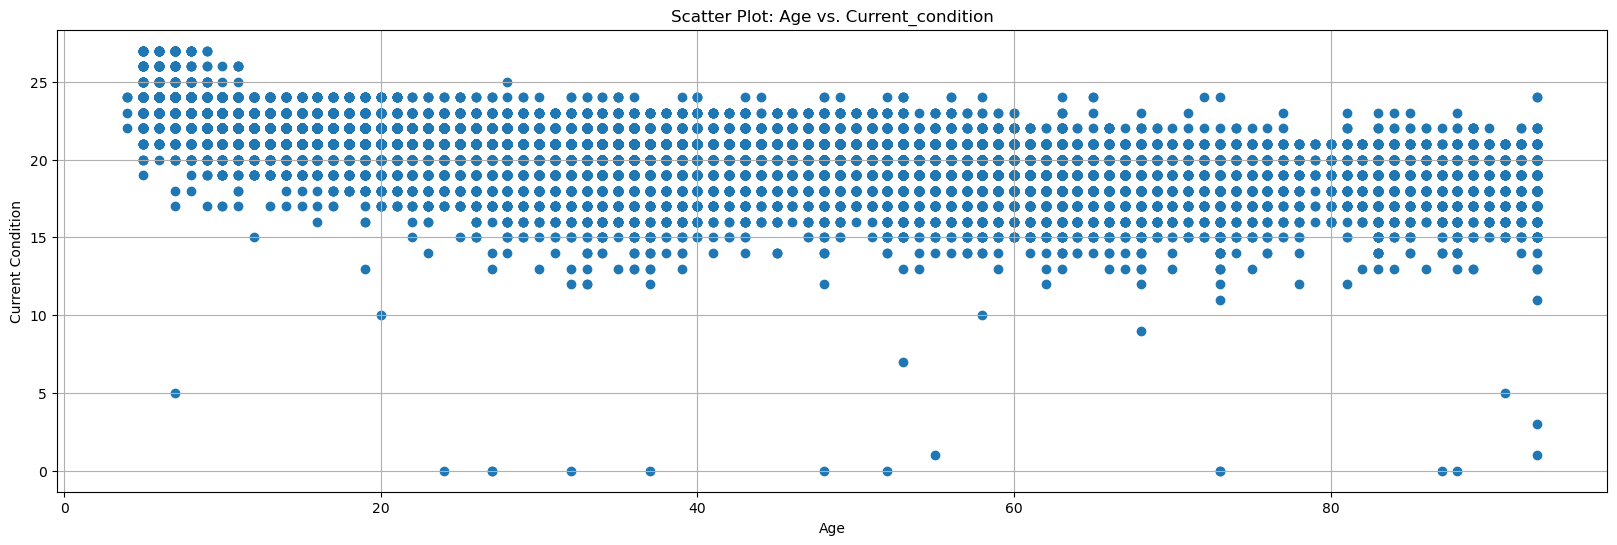

In [18]:
import matplotlib.pyplot as plt

# Create a scatter plot for Age vs. Current Condition
plt.figure(figsize=(20, 6))
plt.scatter(filtered_bridges['Age'], filtered_bridges['Current_condition'])
plt.title('Scatter Plot: Age vs. Current_condition')
plt.xlabel('Age')
plt.ylabel('Current Condition')
plt.grid(True)
plt.show()

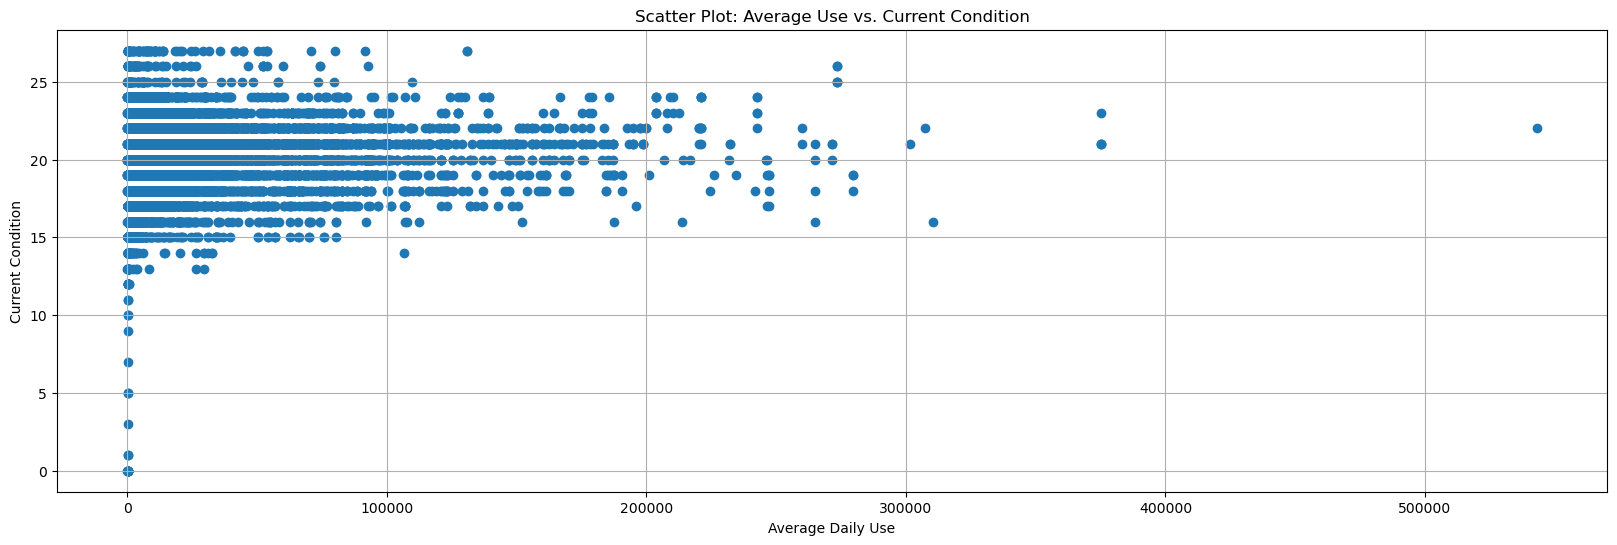

In [19]:
# Create a scatter plot for Average Use vs. Current Condition
plt.figure(figsize=(20, 6))
plt.scatter(filtered_bridges['AverageDaily'], filtered_bridges['Current_condition'])
plt.title('Scatter Plot: Average Use vs. Current Condition')
plt.xlabel('Average Daily Use')
plt.ylabel('Current Condition')
plt.grid(True)
plt.show()

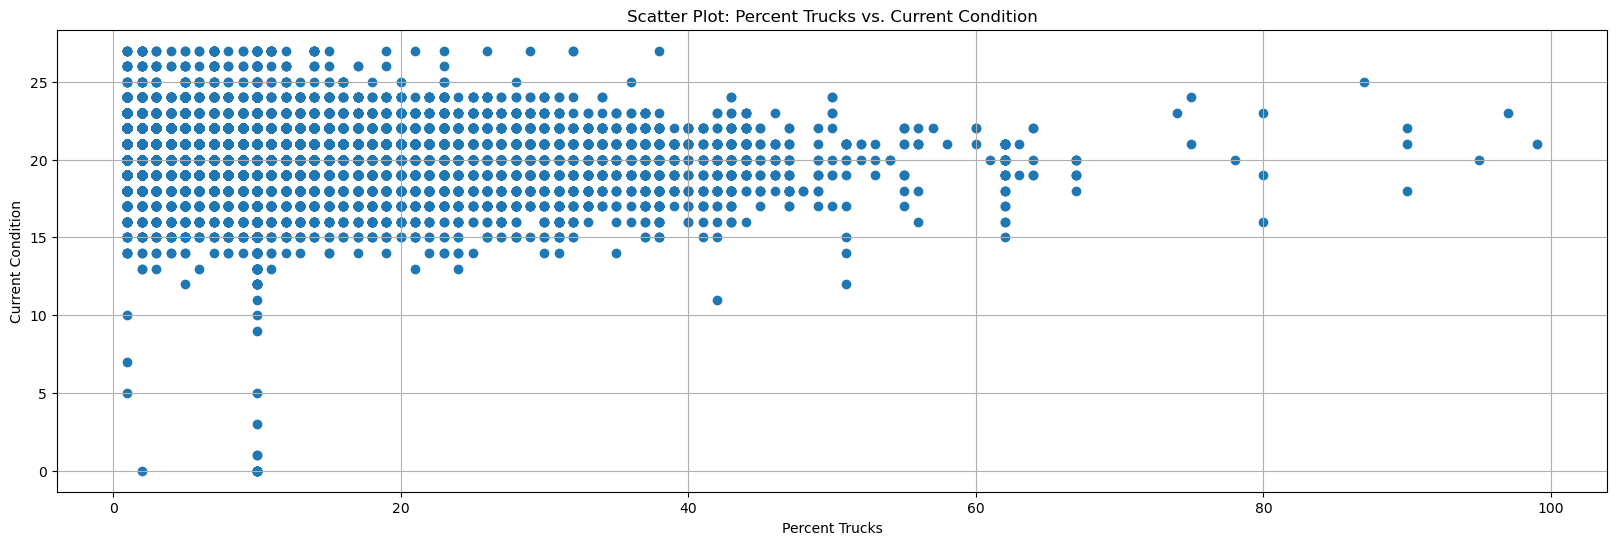

In [20]:
# Create a scatter plot for Percent Trucks vs. Current Condition
plt.figure(figsize=(20, 6))
plt.scatter(filtered_bridges['Trucks_percent'], filtered_bridges['Current_condition'])
plt.title('Scatter Plot: Percent Trucks vs. Current Condition')
plt.xlabel('Percent Trucks')
plt.ylabel('Current Condition')
plt.grid(True)
plt.show()

### Section 2.1.1 Comment on the Graphs:

1. **Age vs. Current Condition**:

   - The scatter plot illustrates a downward trend, indicating that as bridges age, their condition tends to decline.

3. **Average Use vs. Current Condition**:

   - The scatter plot appears widely scattered, indicating no clear linear relationship between these variables.

5. **Percent Trucks vs. Current Condition**:

    - The graph depicts a subtle downward trend, suggesting that a higher percentage of trucks might marginally relate to a lower bridge condition, although this relationship is not notably significant.

It is important to note that due to the weak or near-zero correlations, the scatter plots may need to present clear patterns, given the absence of linear solid relationships between the variables.

In [21]:
# Calculate Pearson's correlation coefficient for Age and Current Condition
correlation_age = filtered_bridges['Age'].corr(filtered_bridges['Current_condition'])

# Calculate Pearson's correlation coefficient for Average Use and Current Condition
correlation_average_use = filtered_bridges['AverageDaily'].corr(filtered_bridges['Current_condition'])

# Calculate Pearson's correlation coefficient for Percent Trucks and Current Condition
correlation_percent_trucks = filtered_bridges['Trucks_percent'].corr(filtered_bridges['Current_condition'])

# Print the correlation coefficients
print(f'Correlation between Age and Current Condition: {correlation_age:.2f}')
print(f'Correlation between Average Use and Current Condition: {correlation_average_use:.2f}')
print(f'Correlation between Percent Trucks and Current Condition: {correlation_percent_trucks:.2f}')

Correlation between Age and Current Condition: -0.59
Correlation between Average Use and Current Condition: 0.03
Correlation between Percent Trucks and Current Condition: -0.08


#### Section 2.1.2 Comment on Correlation Coefficients:

The correlation coefficients provide more insight into the relationships between key variables:

1. **Age and Current Condition (-0.59)**:
   - A moderate negative correlation suggests that as the 'Age' of the bridges increases, the 'Current Condition' tends to decrease. Older bridges are associated with lower condition ratings.

2. **Average Use and Current Condition (0.03)**:
   - With a correlation close to zero, there appears to be almost no linear relationship between 'Average Use' and 'Current Condition.'

3. **Percent Trucks and Current Condition (-0.08)**:
   - A very weak negative correlation implies a slight tendency that a higher percentage of trucks in traffic might be associated with a slightly lower bridge condition.

### Section 2.2 Correlation Analysis of Categorical Varibales vs Current Condiiton 

<Figure size 1200x600 with 0 Axes>

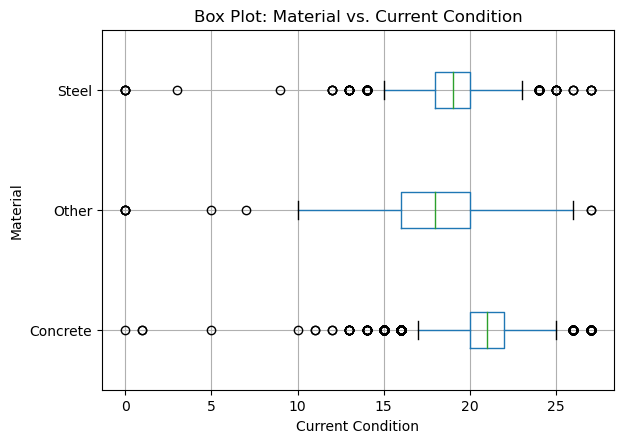

Quantile values for Material vs. Current Condition:
            count       mean       std  min   25%   50%   75%   max
Material                                                           
Concrete  26507.0  20.702116  1.805070  0.0  20.0  21.0  22.0  27.0
Other       521.0  17.838772  3.070473  0.0  16.0  18.0  20.0  27.0
Steel      6517.0  19.095136  1.908473  0.0  18.0  19.0  20.0  27.0


In [22]:
# Create a box plot for Material vs. Current Condition
plt.figure(figsize=(12, 6))
filtered_bridges.boxplot(column='Current_condition', by='Material', vert=False)
plt.title('Box Plot: Material vs. Current Condition')
plt.xlabel('Current Condition')
plt.ylabel('Material')
plt.grid(True)
plt.suptitle('')  # Remove the default title
plt.show()

# Print quantile values for Material vs. Current Condition
quantile_material = filtered_bridges.groupby('Material')['Current_condition'].describe()
print("Quantile values for Material vs. Current Condition:")
print(quantile_material)

<Figure size 1200x600 with 0 Axes>

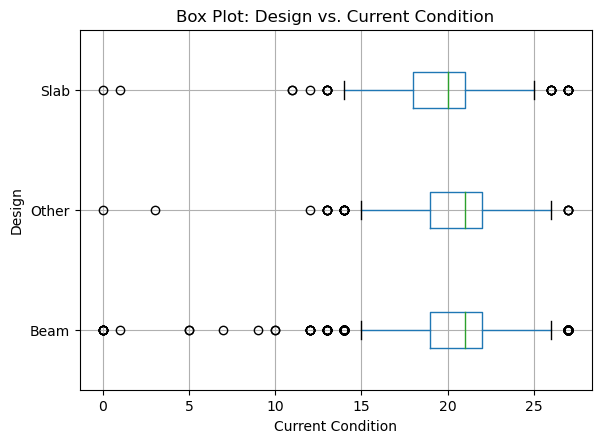

Quantile values for Design vs. Current Condition:
          count       mean       std  min   25%   50%   75%   max
Design                                                           
Beam    27972.0  20.412913  1.927513  0.0  19.0  21.0  22.0  27.0
Other    1532.0  20.593342  2.559501  0.0  19.0  21.0  22.0  27.0
Slab     4041.0  19.784459  2.014137  0.0  18.0  20.0  21.0  27.0


In [23]:
# Create a box plot for Material vs. Current Condition
plt.figure(figsize=(12, 6))
filtered_bridges.boxplot(column='Current_condition', by='Design', vert=False)
plt.title('Box Plot: Design vs. Current Condition')
plt.xlabel('Current Condition')
plt.ylabel('Design')
plt.grid(True)
plt.suptitle('')  # Remove the default title
plt.show()


# Print quantile values for Design vs. Current Condition
quantile_design = filtered_bridges.groupby('Design')['Current_condition'].describe()
print("Quantile values for Design vs. Current Condition:")
print(quantile_design)

#### Section 2.2.1 Analysis of Box Plots and Quantile Values:

##### Box Plot Visual Analysis:

- **Material vs. Current Condition:**
  - 'Concrete' exhibits a tighter interquartile range, showing a more consistent distribution than 'Other' materials and 'Steel'.

- **Design vs. Current Condition:**
  - The 'Beam' and 'Other' designs have similar distributions, while the 'Slab' design shows a broader range of condition ratings with a slightly lower median than the other designs.

##### Material vs. Current Condition:

- **Concrete:** 
  - Median 'Current Condition': 21
  - 25th percentile: 20, 75th percentile: 22
  - Majority of bridges: Condition ratings around 20-22, showing a relatively concentrated distribution.

- **Other (Non-Specified) Material:**
  - Median 'Current Condition': 18
  - 25th percentile: 16, 75th percentile: 20
  - More diverse condition ratings compared to concrete bridges, with a broader range between 16 and 20.

- **Steel:**
  - Median 'Current Condition': 19
  - 25th percentile: 18, 75th percentile: 20
  - Condition ratings primarily range between 18 to 20, showing a slightly narrower spread compared to 'Other' materials.

##### Design vs. Current Condition:

- **Beam:**
  - Median 'Current Condition': 21
  - 25th percentile: 19, 75th percentile: 22
  - Majority of bridges: Condition ratings concentrated between 19 and 22, indicating a relatively consistent distribution.

- **Other Designs:**
  - Median 'Current Condition': 21
  - 25th percentile: 19, 75th percentile: 22
  - Similar spread to 'Beam' design, suggesting comparable overall bridge condition for unspecified designs.

- **Slab:**
  - Median 'Current Condition': 20
  - 25th percentile: 18, 75th percentile: 21
  - Slightly broader variability in condition ratings compared to 'Beam' and 'Other' designs.


### Section 2.3 Preliminary Conclusions Based on Statistical Analysis:

Based on the statistical analysis performed on the five predictor variables - Age, Average Use, Trucks Percent, Material, and Design - in relation to the 'Current Condition' of bridges, several preliminary conclusions can be drawn:

##### Age:
- **Negative Correlation:** A moderate negative correlation (correlation coefficient: -0.59) exists between the 'Age' of bridges and their 'Current Condition.' Older bridges tend to have lower condition ratings.

##### Average Use and Trucks Percent:
- **Weak Correlation:** 'Average Use' and 'Trucks Percent' exhibit very weak correlations (close to zero) with the 'Current Condition.' There is no clear linear relationship observed between these variables and bridge conditions.

##### Material and Design:
- **Varying Influence:** Material and Design types demonstrate differing influences on the 'Current Condition':
  - **Material:** 'Concrete' displays a more consistent distribution with relatively better condition ratings compared to 'Other' materials and 'Steel.'
  - **Design:** 'Beam' and 'Other' designs exhibit better condition ratings, while the 'Slab' design shows slightly broader variability and a lower median.

##### General Observations:
- **Age's Strong Influence:** Bridge age appears to impact their condition, showing a clear negative correlation significantly.
- **Inconclusive Influence of Traffic Variables:** 'Average Use' and 'Trucks Percent' do not exhibit significant correlations with 'Current Condition,' suggesting traffic intensity might not strongly correlate with bridge health.
- **Material and Design Influence:** While Material and Design types display varying impacts on condition ratings, the influence differs. Concrete materials and specific designs exhibit relatively better condition ratings compared to others.

##### Summary:
- The preliminary analysis suggests that the 'Age' of bridges plays a substantial role in determining their condition. However, the influence of 'Average Use' and 'Trucks Percent' seems inconclusive. Material and Design types showcase varying impacts on bridge condition, with concrete material and specific designs exhibiting better condition ratings.

Further analysis and modeling are recommended to explore and quantify the relationships more precisely, including interactions between these variables to better predict or understand the 'Current Condition' of bridges in Texas.


### Part 3: Regression Modelling - Analysing Predictor Variables' Influence on Bridge Condition

This section aims to create a linear regression model to examine the relationship between specific predictor variables and the 'Current Condition' of bridges across Texas. The primary objective is to quantitatively evaluate the impact of pivotal predictors - Age, Average Use, Trucks Percent, Material, and Design - on the condition of bridges.

#### Objectives:

1. **Coefficient of Determination (R2):** Assess the R2 value to evaluate the model's capacity to explain the variability in bridge condition based on the chosen predictors. R2 measures the model's goodness of fit, indicating the proportion of variance in the dependent variable predictable from the independent variables.

2. **Residual Distribution Analysis:** Explore the residuals (errors) to understand their distribution and patterns, aiming to identify potential model deficiencies or systematic biases. This analysis examines the differences between observed and predicted values to check the model's assumptions.

3. **Regression Coefficients Comparison:** Utilise the regression coefficients for a comprehensive evaluation to compare the influence of different predictors on bridge conditions. This assessment aims to discern which factors significantly contribute to determining the condition ratings. The regression coefficients demonstrate the estimated impact of each predictor variable on the target.

#### Approach:

A linear regression model will be built to examine the relationship between the predictor variables and the 'Current Condition' of bridges. The focus will not only be on the individual impact of each predictor but also on the collective effect these predictors have on determining the overall condition of Texas bridges.

Initially, we will analyse the relationship between continuous variables (Age, average daily, and Truck percentage) and current condition. Subsequently, we will incorporate categorical variables to investigate the potential enhancements to the model.

This detailed analysis will offer insights into how each predictor affects the overall condition of bridges, contributing to a comprehensive understanding of the factors influencing bridge conditions in Texas.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Impute missing values in the 'Current_condition' column with median
median_current_condition = filtered_bridges['Current_condition'].median()
filtered_bridges['Current_condition'].fillna(median_current_condition, inplace=True)


y = filtered_bridges.Current_condition # this is the target variable
X = np.column_stack((filtered_bridges.Age, filtered_bridges.AverageDaily , filtered_bridges.Trucks_percent))
X[0:5]

reg = LinearRegression().fit(X, y)
print('The R2 coefficient of determination is %4.3f' % reg.score(X, y))
print('The intercept is %4.1f' % reg.intercept_)
beta_Age, beta_AverageDaily,beta_Trucks_percent = reg.coef_
print('Estimated regression coefficient for Age is %4.2f' % beta_Age,
      'change of current condition')
print('Estimated regression coefficient for Average Daily is %4.2f' % beta_AverageDaily,
      'change of current condition')
print('Estimated regression coefficient for Trucks percentage is %4.2f' % beta_Trucks_percent,
      'change of current condition')

equation = f"Current Condition = {reg.intercept_:.2f} + ({beta_Age:.2f} * Age) + ({beta_AverageDaily:.2f} * Average Daily) + ({beta_Trucks_percent:.2f} * Trucks Percentage)"
print("The regression equation is:", equation)


The R2 coefficient of determination is 0.349
The intercept is 22.4
Estimated regression coefficient for Age is -0.05 change of current condition
Estimated regression coefficient for Average Daily is 0.00 change of current condition
Estimated regression coefficient for Trucks percentage is 0.01 change of current condition
The regression equation is: Current Condition = 22.37 + (-0.05 * Age) + (0.00 * Average Daily) + (0.01 * Trucks Percentage)


### Section 3.1 Interpretation of \( R^2 \) Value

The R2 (Coefficient of Determination) value obtained from the linear regression analysis is 0.349. This value signifies the proportion of variance in the 'Current_condition' variable that can be explained by the selected predictor variables ('Age', 'AverageDaily', 'Trucks_percent') within the linear regression model.

An R2 value of 0.349 implies that approximately 34.90% of the variability observed in the 'Current_condition' can be accounted for by the combination of 'Age', 'AverageDaily', and 'Trucks_percent'. In other words, these predictors collectively influence roughly 34.90% of the changes in the condition of the bridges.

However, it is essential to note that a substantial portion, around 65.10%, of the variance remains unexplained by these variables and the model itself. This suggests that other influential factors or complexities are contributing to the condition of the bridges not included in the current model.

Thus, while the model shows some ability to predict the 'Current_condition', a considerable amount of variation is left unaccounted for. A further refinement, including additional predictor variables or exploring more sophisticated modeling techniques to enhance the predictive accuracy of the model and better understand the determinants affecting the condition of bridges in the dataset.


### Section 3.2: Interpretation of Regression Coefficients and Regression Equation

The regression coefficients obtained from the linear regression model provide insights into the estimated changes in the 'Current_condition' variable corresponding to variations in the predictor variables. Moreover, the presented regression equation encapsulates the relationships between these variables and the resulting condition ratings of bridges.

#### Interpreting the Coefficients:
- **Age Coefficient (-0.05):** A decrease of 0.05 in the 'Current_condition' is expected for every unit increase in the 'Age' of bridges. This suggests a decline in bridge condition as they age, indicating the adverse effect of ageing on their structural integrity.

- **Average Daily Coefficient (0.00):** The negligible coefficient (0.00) suggests that a unit increase in the 'AverageDaily' use has almost no discernible impact on the 'Current_condition'. Hence, the model implies that the average daily usage does not significantly influence the bridge condition.

- **Trucks Percentage Coefficient (0.01):** A marginal increase of 0.01 in the 'Current_condition' is anticipated for every unit increase in the 'Trucks_percent'. This suggests a subtle improvement in the bridge condition with a higher percentage of trucks, indicating a minor positive effect.

#### Understanding the Regression Equation:
The regression equation provides a comprehensive view of the relationships between predictor variables and the 'Current_condition'. It can be formulated as:

\[ \text{Current_condition} = 22.37 - 0.05 \times \text{Age} + 0.00 \times \text{Average Daily} + 0.01 \times \text{Trucks Percentage} \]

This equation offers a precise, quantified estimation of how each predictor contributes to the overall condition rating of bridges, aiding in the understanding of the potential effects of these factors on the bridge conditions.

These interpretations are based on the coefficients derived from the model and should be considered in conjunction with other unmeasured variables that may also impact the condition of bridges.
 bridges.


Root of the mean squared error: 1.60


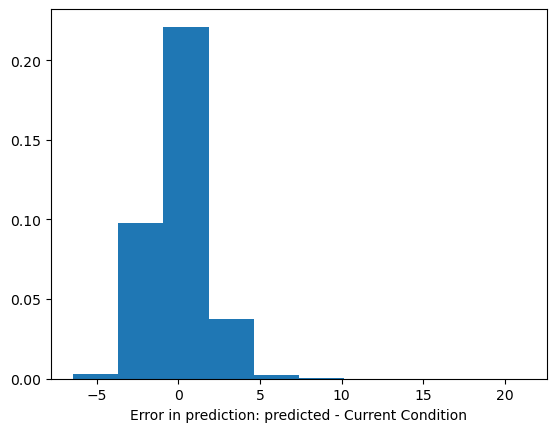

In [25]:
y_hat = reg.predict(X)

fig, a1 = plt.subplots(1, 1)
residuals = y_hat - y
a1.hist(residuals, bins=10, density=True)
_ = a1.set_xlabel('Error in prediction: predicted - Current Condition')


print('Root of the mean squared error: %.2f'% mean_squared_error(y, y_hat, squared=False))

### Section 3.3 Interpretation of Root Mean Squared Error

#### Root Mean Squared Error (RMSE)

RMSE is a widely used metric in assessing the accuracy of a predictive model. It measures the average magnitude of the errors between predicted values and the actual observed values. The RMSE is calculated by taking the square root of the average of squared errors between predicted and observed values. The formula for RMSE is as follows:

\[ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} \]

Where:
- \( y_i \) represents the observed or actual values.
- \( \hat{y}_i \) represents the predicted values.
- \( n \) is the number of observations.

The key characteristics of RMSE include:

1. **Error Interpretation**: RMSE measures how spread out the residuals (prediction errors) are. Its value represents the standard deviation of the prediction errors. Therefore, an RMSE of 1.60 indicates that, on average, the model's predictions deviate by approximately 1.60 units from the actual observed values.

2. **Model Performance**: Lower RMSE values suggest the model predicts better. A smaller RMSE indicates that the model's predictions are closer to the actual values.

3. **Relative Assessment**: It is crucial to consider the scale of the RMSE about the scale of the target variable ('Current_condition'). A higher RMSE relative to the range of the target variable might indicate a significant deviation in predictions.

In summary, RMSE is a valuable tool to quantify the model's predictive accuracy. It enables comparison with other models or evaluation of the same model under different conditions, offering insights into the model's effectiveness in approximating the actual values of the target variable.


**Specifically:**

RMSE provides the square root of the average squared differences between the predicted and observed 'Current_condition' values. In this context, the RMSE of 1.60 implies that, on average, the model's predictions deviate by approximately 1.60 units from the actual observed values of 'Current_condition'. 

Lower RMSE values generally indicate better model performance in making predictions. 

As a general guideline, it is helpful to compare the RMSE to the range of the target variable ('Current_condition'). For example, if the 'Current_condition' varies from 0 to 10, an RMSE of 1.60 could be considered high as it accounts for a significant percentage of the variable's range. On the other hand, if 'Current_condition' values range from 0 to 100, an RMSE of 1.60 would be relatively low. 


In [26]:
filtered_bridges['Current_condition'].max() 

27.0

In [27]:
filtered_bridges['Current_condition'].min()

0.0

If the 'Current_condition' values range from 0 to 27, a RMSE of 1.60 might be considered acceptable.

### Section 3.4: Analysis of Predicted vs Actual Values

The depicted scatter plot showcases the relationship between the predicted values (y_hat) generated by a regression model and the actual observed values (y). Each black data point in the plot represents an individual observation, revealing the alignment between predicted and actual values.

In addition to the data points, the presence of a blue diagonal line offers a benchmark for the line of perfect prediction. This reference line demonstrates the ideal scenario where the predicted values precisely match the observed values, aiming for a complete alignment along this line.

By examining the scatter plot, it's apparent that the model's predicted values are not consistently aligned with the actual observed values. The significant scatter around the diagonal line indicates substantial deviations between predicted and actual values. This scattering suggests that the model, while providing a general prediction trend, lacks consistency in accurately predicting individual data points.

Understanding the discrepancies between predicted and observed values is crucial for evaluating the performance and reliability of the regression model. Aiming for a minimised scatter around the diagonal line would signify an improved alignment between predicted and actual values, enhancing the model's predictive accuracy.


Text(0, 0.5, 'Actual Value')

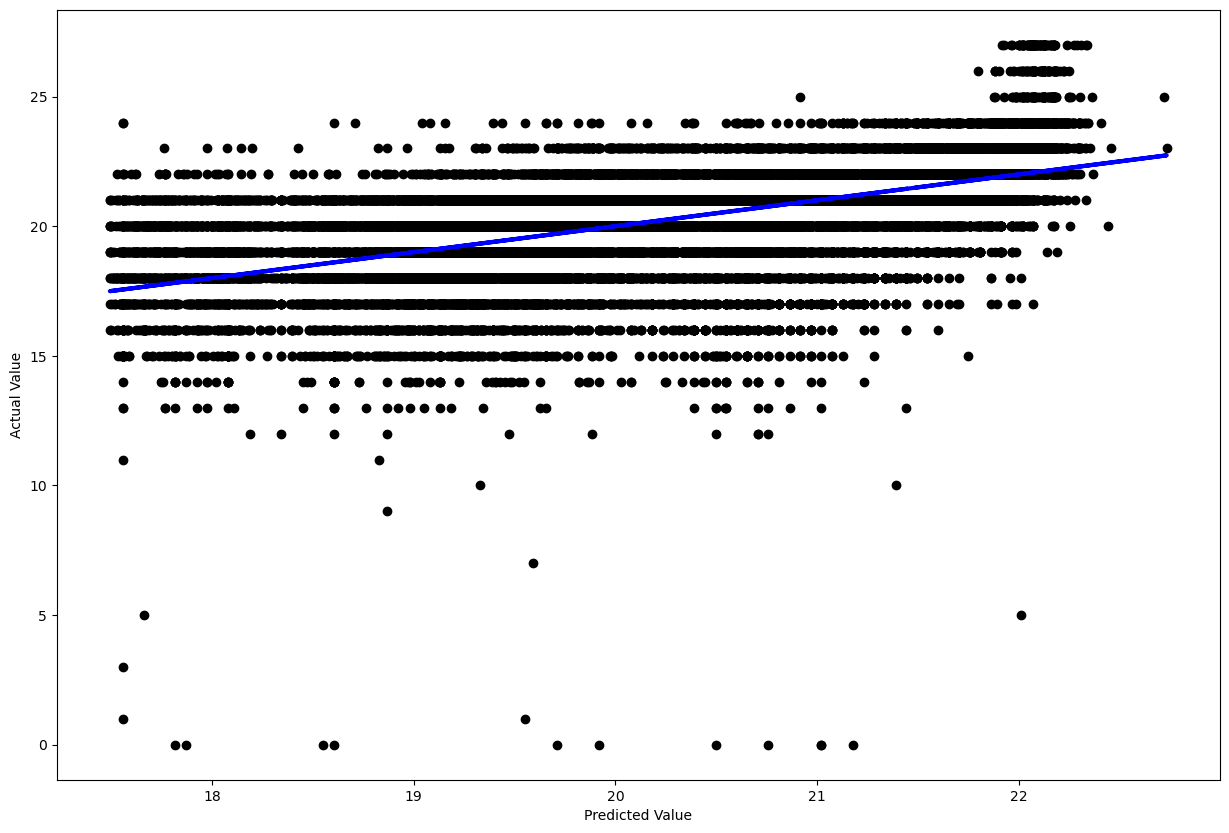

In [28]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(y_hat, y,  color='black')
a.plot(y_hat, y_hat, color='blue', linewidth=3)

two_std = residuals.std() * 2

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

### Section 3.5 Standardising and Evaluating Regression Coefficients

In this section, we apply a standardisation process to the predictor variables to rescale their values. Subsequently, a new linear regression model is constructed to determine the influence of these standardised predictors on the 'Current_condition' of bridges.

#### Objectives:

- **Standardization Process:** We standardise the predictor variables to have a mean of 0 and a standard deviation of 1. Standardisation aids in making a fair comparison of the regression coefficients and in understanding their relative impact on the target variable.

- **Model Building:** Utilising the standardised predictors (Age, AverageDaily, Trucks_percent), a new linear regression model is established to gauge their influence on the 'Current_condition'.

#### Model Evaluation:

- **R2 Coefficient of Determination:** The R2 score measures the model's goodness of fit concerning the standardised predictor variables and the 'Current_condition'.

- **Interpreting Regression Coefficients:** The regression coefficients obtained post-standardisation provide insights into the expected changes in the 'Current_condition' for each standard deviation shift in the standardized predictor variables.

This process allows for a more meaningful comparison between the predictors and their influence on the bridge conditions by ensuring that all predictors are on the same scale.
the same scale.


In [29]:
Z = StandardScaler().fit_transform(X)

reg1 = LinearRegression().fit(Z, y)
print('The R2 coefficient of determination is %4.3f' % reg.score(X, y))
print('The intercept is %4.1f' % reg1.intercept_)
beta_Age, beta_AverageDaily, beta_Trucks_percent = reg1.coef_
print('Estimated regression coefficient for standardised Age is %4.2f' % beta_Age)
print('Estimated regression coefficient for standardised Average Daily is %4.2f' % beta_AverageDaily)
print('Estimated regression coefficient for standardised Trucks percent is %4.2f' % beta_Trucks_percent)

equation = f"Current Condition = {reg.intercept_:.2f} + ({beta_Age:.2f} * Age) + ({beta_AverageDaily:.2f} * Average Daily) + ({beta_Trucks_percent:.2f} * Trucks Percentage)"
print("The regression equation is:", equation)

The R2 coefficient of determination is 0.349
The intercept is 20.3
Estimated regression coefficient for standardised Age is -1.18
Estimated regression coefficient for standardised Average Daily is 0.01
Estimated regression coefficient for standardised Trucks percent is 0.06
The regression equation is: Current Condition = 22.37 + (-1.18 * Age) + (0.01 * Average Daily) + (0.06 * Trucks Percentage)


### Section 3.6 Comparison of Regression Coefficients Before and After Standardisation

#### Before Standardisation:
- **R2 Coefficient of Determination:** 0.349
- **Intercept:** 22.4
- **Age Coefficient:** -0.05
- **Average Daily Coefficient:** 0.00
- **Trucks Percentage Coefficient:** 0.01

**Regression Equation:** Current Condition = 22.37 + (-0.05 * Age) + (0.00 * Average Daily) + (0.01 * Trucks Percentage)

#### After Standardisation:
- **R2 Coefficient of Determination:** 0.349
- **Intercept:** 20.3
- **Standardized Age Coefficient:** -1.18
- **Standardized Average Daily Coefficient:** 0.01
- **Standardized Trucks Percentage Coefficient:** 0.06

**Regression Equation:** Current Condition = 22.37 + (-1.18 * Age) + (0.01 * Average Daily) + (0.06 * Trucks Percentage)

The standardised coefficients allow us to compare the impact of each predictor variable on the 'Current Condition' more directly, given that they are all on the same scale. Interestingly, there is no substantial difference between the values before and after standardisation. Despite the change in numerical values, the relationships between the predictors and the 'Current Condition' remained relatively consistent. This suggests that while the scale has shifted, the relative influence of the predictors on the condition of bridges has not drastically changed. It is notable that the model's overall performance, as indicated by the R2 value, also remained the same post-standardisation. 


### Section 3.7 Enhanced Analysis: Integrating Categorical and Continuous Variables in Regression

This section presents an advanced analysis technique that combines categorical and continuous predictors in a linear regression model. The main focus is on using standardised coefficients to allow for a more precise comparison among predictors and their respective impacts on the condition of bridges. We have established this to be true above. 

1. **Incorporating Categorical Data:**
   - Employed one-hot encoding to convert categorical features ('Design' and 'Material') into binary columns.
   - Expanded the dataset by generating new columns for each categorical value, including categorical variables in the regression model without establishing a ranking among categories.

2. **Creating the Feature Matrix:**
   - Merged numerical attributes ('Age', 'AverageDaily', 'Trucks_percent') with the one-hot encoded categorical columns, forming an extended feature matrix ('X2') encompassing numerical and categorical information.

3. **Model Development and Evaluation:**
   - Constructed a novel linear regression model ('reg2') to predict the 'Current_condition', integrating a more comprehensive range of predictors.
   - Assessed the model's performance by calculating the R2 coefficient of determination.

The main objective of this approach was to create a more robust model by combining numerical and categorical variables. This strategy aimed to enhance the model's ability to explain the variations observed in the bridge conditions, offering a comprehensive view of the predictors' influence in the dataset.


In [30]:
Design = pd.get_dummies(filtered_bridges.Design, drop_first=False)
Material = pd.get_dummies(filtered_bridges.Material, drop_first=False)

X2 = np.column_stack((filtered_bridges.Age, filtered_bridges.AverageDaily, filtered_bridges.Trucks_percent, Design.Beam, Design.Other, Design.Slab, Material.Concrete, Material.Other, Material.Steel))

# Standardise the feature matrix X2
scaler = StandardScaler()
X2_standardised = scaler.fit_transform(X2)

# Fit a linear regression model on the standardised data
reg2_standardised = LinearRegression().fit(X2_standardised, y)

# Print the R2, intercept, and coefficients for the standardised data
print('The R2 coefficient of determination for standardised data is %4.3f' % reg2_standardised.score(X2_standardised, y))
print('The intercept for standardised data is %4.1f' % reg2_standardised.intercept_)
print('The regression coefficients for standardised data are:', reg2_standardised.coef_)

# Get the coefficients and column names
coefficients_standardised = reg2_standardised.coef_
columns = ['Age', 'AverageDaily', 'Trucks_percent', 'Design_Beam', 'Design_Other', 'Design_Slab', 'Material_Concrete', 'Material_Other', 'Material_Steel']

# Get the intercept
intercept_standardised = reg2_standardised.intercept_

# Construct the equation for the standardised data
equation_standardised = f"Current Condition = {intercept_standardised:.1f}"
for col, coeff in zip(columns, coefficients_standardised):
    equation_standardised += f" + ({coeff:.2f} * {col})"

print(equation_standardised)  


The R2 coefficient of determination for standardised data is 0.448
The intercept for standardised data is 20.3
The regression coefficients for standardised data are: [-1.11865311e+00 -1.47321106e-02 -4.46446959e-04 -1.02898293e+08
 -5.77836957e+07 -8.99555610e+07  6.10746810e+08  1.85452783e+08
  5.93459716e+08]
Current Condition = 20.3 + (-1.12 * Age) + (-0.01 * AverageDaily) + (-0.00 * Trucks_percent) + (-102898292.53 * Design_Beam) + (-57783695.69 * Design_Other) + (-89955561.01 * Design_Slab) + (610746810.04 * Material_Concrete) + (185452782.59 * Material_Other) + (593459716.15 * Material_Steel)


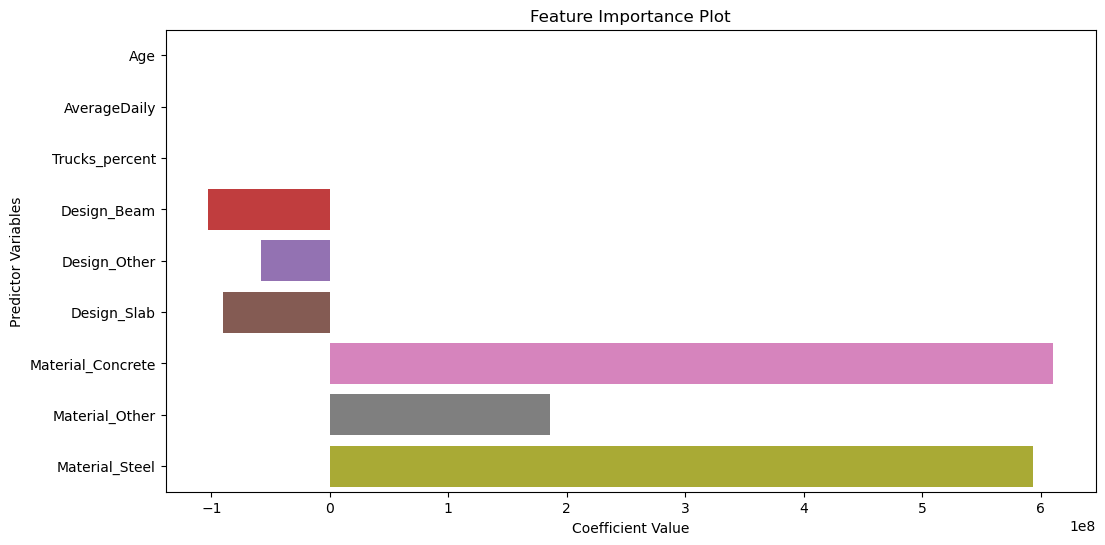

In [31]:
import seaborn as sns

# Feature Importance Plot
plt.figure(figsize=(12, 6))
coef = reg2_standardised.coef_
sns.barplot(x=coef, y=columns)
plt.title('Feature Importance Plot')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor Variables')

plt.show()

### Section 3.8 Conclusions from Regression Modelling 

The analysis aligns with the Texas Department of Transportation's main questions, offering insights into essential aspects of predicting bridge conditions and understanding the impact of key variables. Here is a comprehensive summary addressing the crucial inquiries:

#### 1. **Predictive Strength of Variables:**
The standardised model showed a notable improvement in the R2 coefficient of determination, indicating the selected variables' enhanced predictive capacity. It could predict around 44.8% of the variance observed in the current bridge conditions, a marked increase from the R2 of 0.349 obtained in the previous model.

#### 2. **Impact of Variables on Bridge Condition:**
The standardised coefficients highlighted the substantial influence of the 'Material' and 'Design' variables on the current condition of bridges. These variables emerged as more influential than 'Age', signifying that the material used and the design aspects significantly affect the bridge conditions. The regression equation illustrates these relationships explicitly: Current Condition = 20.3 + (-1.12 * Age) + (-0.01 * AverageDaily) + (-0.00 * Trucks_percent) + (-102898292.53 * Design_Beam) + (-57783695.69 * Design_Other) + (-89955561.01 * Design_Slab) + (610746810.04 * Material_Concrete) + (185452782.59 * Material_Other) + (593459716.15 * Material_Steel).

The regression coefficients emphasise the influence of the 'Material' and 'Design' variables, with 'Material' showing a considerably more significant impact on the current condition than 'Age'. Specifically, each one-unit increase in 'Material_Concrete', 'Material_Other', or 'Material_Steel' results in notable changes to the current condition of the bridges, as reflected by their corresponding coefficients.et.


## Comparison: Preliminary Analysis vs. Regression Conclusion

**Preliminary Conclusion Based on Statistical Analysis**

- **Age:** 
  - *Preliminary Analysis:* Showed a moderate negative correlation (correlation coefficient: -0.59) between bridge 'Age' and their 'Current Condition,' indicating older bridges tend to have lower condition ratings.
  - *Regression Conclusion:* 'Age' demonstrated a substantial negative impact in the regression model, reflected by a significant coefficient of -1.12. It retains its status as a significant predictor in the regression equation.

- **Average Use and Trucks Percent:** 
  - *Preliminary Analysis:* Revealed weak correlations with 'Current Condition' (close to zero), implying an indistinct linear relationship with the condition of bridges.
  - *Regression Conclusion:* Similarly, 'Average Use' and 'Trucks Percent' maintained negligible coefficients close to zero in the regression equation, indicating a weak influence on bridge conditions.

- **Material and Design:** 
  - *Preliminary Analysis:* Indicated different influences of 'Material' and 'Design' types on 'Current Condition,' noting varying condition ratings between Concrete, Other materials, and Steel, as well as among Beam, Other, and Slab designs.
  - *Regression Conclusion:* The regression model demonstrated the remarkable influence of 'Material' and 'Design' variables on the 'Current Condition,' showing these factors to be more influential than 'Age' and depicting their significant impact on bridge conditions. The coefficients in the regression equation confirm their significant influence, especially 'Material' showing a considerably more significant impact.

**Comparison:**

The preliminary analysis' observations aligned somewhat with the regression modelling results. Both approaches identified 'Age' as a significant predictor for the bridge's condition, indicating a decrease in condition rating with older bridge age. In contrast, 'Average Use' and 'Trucks Percent' exhibited weak correlations or negligible coefficients in both analyses, suggesting a weak relationship with the bridge condition. However, the notable difference arises in the influence of 'Material' and 'Design'. While the preliminary analysis highlighted varying impacts, the regression model conclusively proved the substantial influence of these variables on the bridge's condition, indicating a hierarchy of influence among them. This provides a more precise and validated understanding of the impact of these variables on bridge conditions.


## Final Thoughts

The analysis conducted via both preliminary and regression modelling approaches unveiled nuanced insights into the predictors affecting the condition of bridges. While the initial analysis laid a foundation by identifying some correlations, the regression modelling substantially refined our understanding by quantifying and prioritising the influence of key variables on bridge conditions.

This comprehensive understanding, accentuated by the regression modelling results, equips stakeholders to make more informed decisions for proactive maintenance strategies, focusing primarily on mitigating the effect of bridge age. The insights offered valuable direction for resource allocation, prioritising maintenance efforts and indicating the need for heightened attention to certain materials and designs.

By amalgamating statistical analysis and predictive modelling, this study aimed to provide a robust understanding of the factors influencing bridge conditions, effectively enabling the Texas Department of Transportation to adopt more informed, data-driven strategies for the upkeep of its bridge infrastructure.